# **DS** test assignment from mobile operator

Binary classification problem:
"1" - the subscriber is a driver (belongs to the drivers segment),
"0" - the subscriber is not a driver (does not belong to the drivers segment).

The files tabular_data.csv and hashed_feature.csv ̶ here are descriptive characteristics for 4084 subscribers ("ID" is the subscriber ID).
The train.csv file ̶ is the target label data (the subscriber's belonging to the driver segment).
File test.csv ̶ is the list of subscribers for which we want to make a prediction, by which we will evaluate the quality of the model. The ROC-AUC is used as the metric.

"The file tabular_data.csv contains the numeric data on the activity of subscribers for 12 periods.
- period - period number (periods are consecutive, 1 is the newest)
- id - subscriber ID
- feature_0 - feature_49 - data on the subscriber's activity in the corresponding period.


"File hashed_feature.csv - here is the set of hashed values of one categorical variable for the subscriber.
- id - subscriber's identifier
- feature_50 - hash of the value of the categorical variable.


"File train.csv - here is the data with the target label.
- id - identifier of the target
- target - target label value (1 - belongs to drivers segment, 0 - does not belong to drivers segment).


"test.csv file - list of subscribers for which you want to make predictions with your models.
- id - the subscriber's identifier
- score - the probability that the caller belongs to the drivers segment (class "1"). This probability is determined by your model.


You need to build your model on the subscribers whose target label is contained in the train.csv file. 
To do this, you need to use data from tabular_data.csv and hashed_feature.csv files. 
Then, using your model, you need to fill in the score column for the subscribers from the test.csv file - the probability that the subscriber belongs to the driver segment. 
Note that you need to predict the fact of the relation to the drivers segment, without reference to the period.

**P.S. The target in ROC-AUC is 90%+**

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,id,target
0,0,0
1,1,0
2,2,1
3,3,0
4,4,1
...,...,...
4079,4079,0
4080,4080,0
4081,4081,0
4082,4082,0


In [4]:
tabular_data = pd.read_csv('tabular_data.csv')

In [5]:
tabular_data.head()

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,1,110.0,55.0,0.432017,0.000000,176.78,0.0,0.323712,NaN,...,0.00,0,0.000000,0.0,55.0,2.0,0.526552,145.0,133.28,0.0
1,0,2,110.0,110.0,0.397517,0.000000,315.42,0.0,0.316798,NaN,...,0.00,0,0.000000,0.0,110.0,1.0,0.481063,130.0,229.97,0.0
2,0,3,110.0,55.0,0.359440,0.000000,354.55,0.0,0.339188,NaN,...,0.07,0,0.000000,0.0,55.0,1.0,0.509598,180.0,231.78,0.0
3,0,4,110.0,55.0,0.285707,0.000000,229.98,0.0,0.415428,NaN,...,0.00,0,0.000000,0.0,55.0,0.0,0.680089,142.0,183.83,0.0
4,0,5,110.0,55.0,0.101487,444.730391,307.12,0.0,0.569670,NaN,...,0.95,0,20.014485,0.0,55.0,0.0,0.776175,85.0,155.83,0.0


In [6]:
tabular_data['id'].value_counts()

0       12
3401    12
3408    12
3407    12
3406    12
        ..
1701    12
1700    12
1699    12
1698    12
5105    12
Name: id, Length: 5106, dtype: int64

In [7]:
train.columns

Index(['id', 'target'], dtype='object')

In [8]:
tabular_grouped = tabular_data.groupby('id')[['feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
       'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22',
       'feature_23', 'feature_24', 'feature_26', 'feature_27',
       'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32',
       'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37',
       'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42',
       'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47',
       'feature_48', 'feature_49']].mean().reset_index()

In [9]:
tabular_data.columns

Index(['id', 'period', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18',
       'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
       'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28',
       'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33',
       'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38',
       'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43',
       'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48',
       'feature_49'],
      dtype='object')

In [10]:
list(range(1,13))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [11]:
dfs = []
for period in range(1,13):
  t = tabular_data[tabular_data['period']==period][['id','feature_0', 'feature_1', 'feature_2', 'feature_3',
        'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
        'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
        'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18',
        'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
        'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28',
        'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33',
        'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38',
        'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43',
        'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48',
        'feature_49']].copy().reset_index()
  t.columns = [col + '_'+str(period) for col in t.columns]
  dfs.append(t)

In [12]:
len(dfs)

12

In [13]:
tabular_horizontal = pd.concat(dfs,axis=1).reset_index().copy()

In [14]:
tabular_horizontal

,index,index_1,id_1,feature_0_1,feature_1_1,feature_2_1,feature_3_1,feature_4_1,feature_5_1,feature_6_1,...,feature_40_12,feature_41_12,feature_42_12,feature_43_12,feature_44_12,feature_45_12,feature_46_12,feature_47_12,feature_48_12,feature_49_12
0,0,0,0,110.0,55.00,0.432017,0.000000,176.78,0.000000,0.323712,...,0.10,0,0.000000,0.0,56.00,1.0,NaN,102.0,91.12,2.000000
1,1,12,1,110.0,125.00,0.083174,5893.939371,812.20,0.000000,0.417209,...,0.23,0,535.582940,0.0,125.00,13.0,NaN,184.0,NaN,2433.009568
2,2,24,2,110.0,1.17,NaN,0.000000,4.05,0.000000,0.603306,...,0.70,0,-0.000000,0.0,0.00,0.0,NaN,2.0,1.02,0.000000
3,3,36,3,110.0,33.50,0.008239,266.829103,127.92,0.000000,0.695500,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,48,4,110.0,103.00,0.162015,4449.334872,535.37,0.000000,0.680469,...,19.04,0,7.059559,0.0,72.93,44.0,NaN,195.0,NaN,14.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101,5101,61212,5101,110.0,85.00,0.257097,1174.050537,737.28,1178.533981,0.052646,...,0.00,0,0.020291,0.0,85.00,19.0,NaN,168.0,1111.77,9.000000
5102,5102,61224,5102,110.0,85.00,5.184616,0.000000,442.03,0.000000,0.784332,...,0.00,0,0.000000,1.0,0.00,10.0,NaN,53.0,28.90,1.000000
5103,5103,61236,5103,112.0,0.00,0.452319,0.000000,0.28,0.000000,0.477645,...,1.62,0,0.000000,0.0,0.00,0.0,NaN,11.0,NaN,0.000000
5104,5104,61248,5104,110.0,75.00,0.060569,2153.343195,78.45,0.000000,0.614655,...,-0.01,0,0.256103,1.0,75.00,12.0,NaN,94.0,74.47,2.000000


In [15]:
df = train.merge(tabular_horizontal,how='left',left_on='id',right_on='id_1')

In [16]:
hash_feature = pd.read_csv('hashed_feature.csv')

In [17]:
hash_feature.dropna(inplace=True)
hash_joined = hash_feature.groupby('id')['feature_50'].apply(lambda x: ' '.join(x)).reset_index()

In [18]:
hash_joined.head()

,id,feature_50
0,0,7984b0a0e139cabadb5afc7756d473fb34d23819 47904...
1,1,b9bd0ce1fa4ae3e15721b59467b686db6fdf99ed a013c...
2,2,f037f1a9708bb2438a38d58fb441ac4008b0e831 7984b...
3,3,3d11305bc7de6663644acf3066ecca90f2e5acb8 10a66...
4,4,db6e2207646e991c7c196063bdc9377fb416c732 745dd...


In [19]:
hash_joined.dtypes

id             int64
feature_50    object
dtype: object

In [20]:
df = df.merge(hash_joined,how='left',on='id')

In [21]:
df

,id,target,index,index_1,id_1,feature_0_1,feature_1_1,feature_2_1,feature_3_1,feature_4_1,...,feature_41_12,feature_42_12,feature_43_12,feature_44_12,feature_45_12,feature_46_12,feature_47_12,feature_48_12,feature_49_12,feature_50
0,0,0,0,0,0,110.0,55.00,0.432017,0.000000,176.78,...,0,0.000000,0.0,56.00,1.0,NaN,102.0,91.12,2.000000,7984b0a0e139cabadb5afc7756d473fb34d23819 47904...
1,1,0,1,12,1,110.0,125.00,0.083174,5893.939371,812.20,...,0,535.582940,0.0,125.00,13.0,NaN,184.0,NaN,2433.009568,b9bd0ce1fa4ae3e15721b59467b686db6fdf99ed a013c...
2,2,1,2,24,2,110.0,1.17,NaN,0.000000,4.05,...,0,-0.000000,0.0,0.00,0.0,NaN,2.0,1.02,0.000000,f037f1a9708bb2438a38d58fb441ac4008b0e831 7984b...
3,3,0,3,36,3,110.0,33.50,0.008239,266.829103,127.92,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3d11305bc7de6663644acf3066ecca90f2e5acb8 10a66...
4,4,1,4,48,4,110.0,103.00,0.162015,4449.334872,535.37,...,0,7.059559,0.0,72.93,44.0,NaN,195.0,NaN,14.000000,db6e2207646e991c7c196063bdc9377fb416c732 745dd...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,4079,0,4079,48948,4079,110.0,55.00,0.405521,0.000000,129.28,...,0,0.000000,0.0,35.00,11.0,NaN,54.0,76.27,3.000000,5610e17bb04b6b2beda67686b286067152d306e4 361ba...
4080,4080,0,4080,48960,4080,110.0,55.00,0.331616,0.000000,4.20,...,0,0.000000,2.0,35.00,13.0,NaN,19.0,19.52,14.000000,0ae2b692ede3142a73fa16dda87769e5283144ff 7984b...
4081,4081,0,4081,48972,4081,110.0,95.00,0.573053,0.000000,97.95,...,0,0.000000,0.0,55.00,15.0,NaN,17.0,26.70,3.000000,d145c960ef99587c2759b6bf8220395e6062e1e3 1c491...
4082,4082,0,4082,48984,4082,110.0,55.00,0.300214,0.000000,1003.20,...,0,0.721302,0.0,0.00,1.0,NaN,117.0,2726.87,2.000000,947389ecd57609440d0074b9444ddcd413607d09 3617b...


In [22]:
df = df[~df['feature_50'].isna()].copy()

In [23]:
df.columns

Index(['id', 'target', 'index', 'index_1', 'id_1', 'feature_0_1',
       'feature_1_1', 'feature_2_1', 'feature_3_1', 'feature_4_1',
       ...
       'feature_41_12', 'feature_42_12', 'feature_43_12', 'feature_44_12',
       'feature_45_12', 'feature_46_12', 'feature_47_12', 'feature_48_12',
       'feature_49_12', 'feature_50'],
      dtype='object', length=628)

In [24]:
'id_12'[:2]

'id'

In [25]:
'index'[:5]

'index'

In [26]:
X_col_new = [col for col in df.columns if col != 'target' if col[:2] != 'id' if col[:5] != 'index']

In [27]:
X_col_new

['feature_0_1',
 'feature_1_1',
 'feature_2_1',
 'feature_3_1',
 'feature_4_1',
 'feature_5_1',
 'feature_6_1',
 'feature_7_1',
 'feature_8_1',
 'feature_9_1',
 'feature_10_1',
 'feature_11_1',
 'feature_12_1',
 'feature_13_1',
 'feature_14_1',
 'feature_15_1',
 'feature_16_1',
 'feature_17_1',
 'feature_18_1',
 'feature_19_1',
 'feature_20_1',
 'feature_21_1',
 'feature_22_1',
 'feature_23_1',
 'feature_24_1',
 'feature_25_1',
 'feature_26_1',
 'feature_27_1',
 'feature_28_1',
 'feature_29_1',
 'feature_30_1',
 'feature_31_1',
 'feature_32_1',
 'feature_33_1',
 'feature_34_1',
 'feature_35_1',
 'feature_36_1',
 'feature_37_1',
 'feature_38_1',
 'feature_39_1',
 'feature_40_1',
 'feature_41_1',
 'feature_42_1',
 'feature_43_1',
 'feature_44_1',
 'feature_45_1',
 'feature_46_1',
 'feature_47_1',
 'feature_48_1',
 'feature_49_1',
 'feature_0_2',
 'feature_1_2',
 'feature_2_2',
 'feature_3_2',
 'feature_4_2',
 'feature_5_2',
 'feature_6_2',
 'feature_7_2',
 'feature_8_2',
 'feature_9_2',


In [28]:
'target' in X_col_new

False

In [29]:
'feature_25'[8:10]

'25'

In [30]:
cat_features_new = [col for col in df.columns if col[8:10] == '25']

In [31]:
cat_features_new

['feature_25_1',
 'feature_25_2',
 'feature_25_3',
 'feature_25_4',
 'feature_25_5',
 'feature_25_6',
 'feature_25_7',
 'feature_25_8',
 'feature_25_9',
 'feature_25_10',
 'feature_25_11',
 'feature_25_12']

In [32]:
X_col = ['id', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
       'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22',
       'feature_23', 'feature_24',  'feature_26', 'feature_27',
       'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32',
       'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37',
       'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42',
       'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47',
       'feature_48', 'feature_49','feature_50']

In [33]:
X_col_top10 = ['feature_50',
 'feature_6',
 'feature_46',
 'feature_25',
 'feature_13',
 'feature_47',
 'feature_26',
 'feature_12',
 'feature_19',
 'feature_31']


In [34]:
y_col = ['target']

In [35]:
cat_features = ['feature_25']

In [36]:
text_features = ['feature_50']

In [37]:
len(df)

4083

In [38]:
train = df.sample(frac=0.7,random_state=42).copy()
val = df[~df.index.isin(train.index)]

In [39]:
len(train) + len(val)

4083

In [40]:
len(df)

4083

In [41]:
train.shape

(2858, 628)

In [42]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
from catboost import CatBoostClassifier

In [44]:
model = CatBoostClassifier(learning_rate=0.01,verbose=100,eval_metric='AUC',
                           cat_features=cat_features_new,
                           text_features=text_features,
                           )

In [45]:
model.fit(train[X_col_new],train[y_col],eval_set=(val[X_col_new],val[y_col]),early_stopping_rounds=100)

0:	test: 0.6851241	best: 0.6851241 (0)	total: 563ms	remaining: 9m 22s
100:	test: 0.7346305	best: 0.7368189 (70)	total: 57s	remaining: 8m 27s
200:	test: 0.7389094	best: 0.7389094 (200)	total: 1m 45s	remaining: 6m 57s
300:	test: 0.7401575	best: 0.7401889 (288)	total: 2m 38s	remaining: 6m 7s
400:	test: 0.7423074	best: 0.7424577 (397)	total: 3m 28s	remaining: 5m 11s
500:	test: 0.7429052	best: 0.7429087 (492)	total: 4m 16s	remaining: 4m 15s
600:	test: 0.7430240	best: 0.7431604 (528)	total: 5m 3s	remaining: 3m 21s
700:	test: 0.7425102	best: 0.7434960 (606)	total: 5m 50s	remaining: 2m 29s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7434959833
bestIteration = 606

Shrink model to first 607 iterations.


In [46]:
1/12

0.08333333333333333

In [47]:
df['target'].mean()

0.263286798922361

In [48]:
fi = pd.DataFrame({'name':X_col_new,'w':model.feature_importances_})
fi.sort_values('w',ascending=False,inplace=True)

In [49]:
fi.head(10)

,name,w
600,feature_50,13.660998
556,feature_6_12,2.989040
246,feature_46_5,2.459778
496,feature_46_10,2.337678
206,feature_6_5,2.087254
456,feature_6_10,1.847074
346,feature_46_7,1.810362
96,feature_46_2,1.671256
146,feature_46_3,1.624780
106,feature_6_3,1.422275


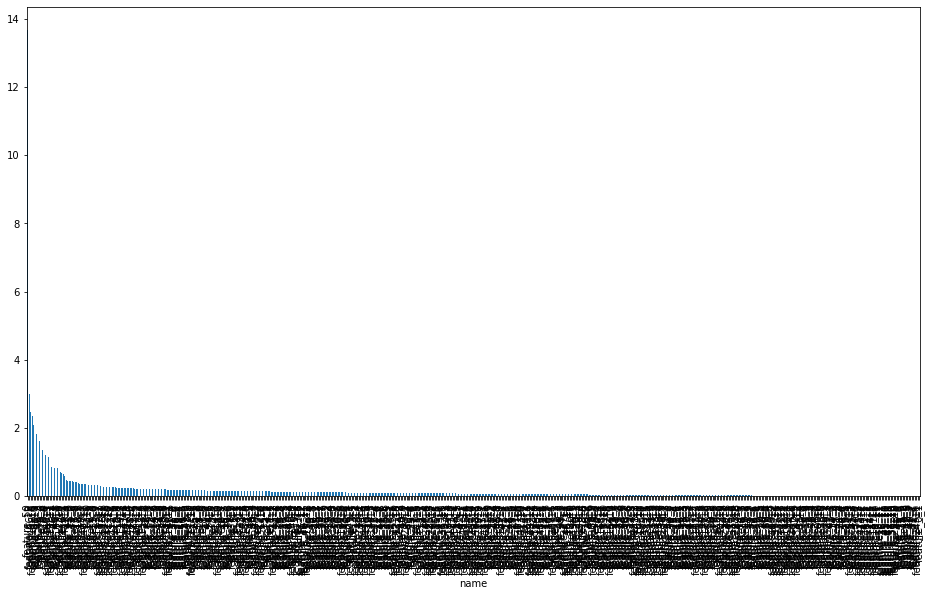

In [50]:
fi.set_index('name')['w'].plot(kind='bar',figsize=(16,9))

In [51]:
list(fi.head(10)['name'].values)

['feature_50',
 'feature_6_12',
 'feature_46_5',
 'feature_46_10',
 'feature_6_5',
 'feature_6_10',
 'feature_46_7',
 'feature_46_2',
 'feature_46_3',
 'feature_6_3']

In [52]:
df.apply(lambda col: col.nunique()).reset_index().sort_values(0)

,index,0
623,feature_46_12,0
514,feature_41_10,1
410,feature_41_8,1
462,feature_41_9,1
358,feature_41_7,1
...,...,...
334,feature_17_7,4083
316,id_7,4083
315,index_7,4083
420,id_9,4083
